In [ ]:
#Regression Model
#Used Random Forest Regression Model
# Data -> Data Preprocessing ->Data Analysis ->Train Tes Split-> Random Forest regressor -> Evaluation

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()  #GLD is the target

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#shape
gold_data.shape

(2290, 6)

In [ ]:
#getting basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1)Positive Correlation

2)Negative Correlation

In [ ]:
correlation=gold_data.corr()

<ipython-input-9-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


Text(0.5, 1.0, 'Correlation')

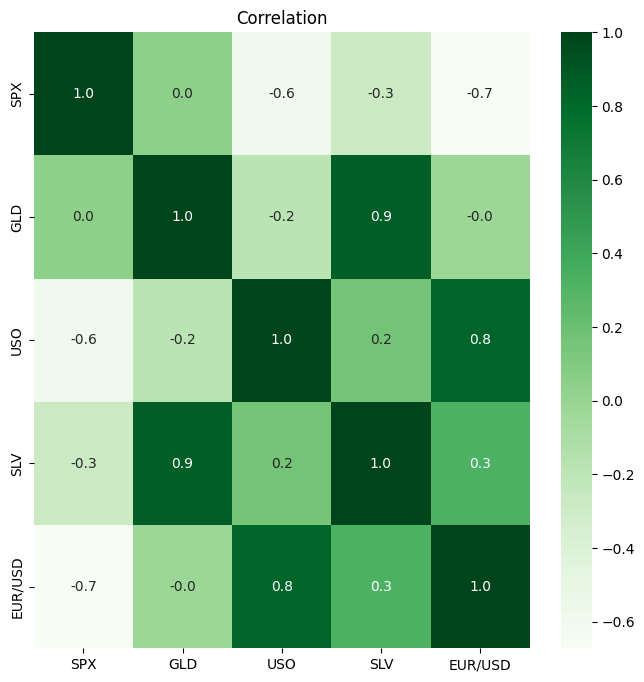

In [ ]:
#constructing heatmap to understand clearly
plt.figure(figsize=(8,8))
sns.heatmap(correlation ,cbar=True,annot=True, cmap='Greens',fmt='.1f')
plt.title('Correlation')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-133eb88e2d4b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Red')


<Axes: xlabel='GLD', ylabel='Density'>

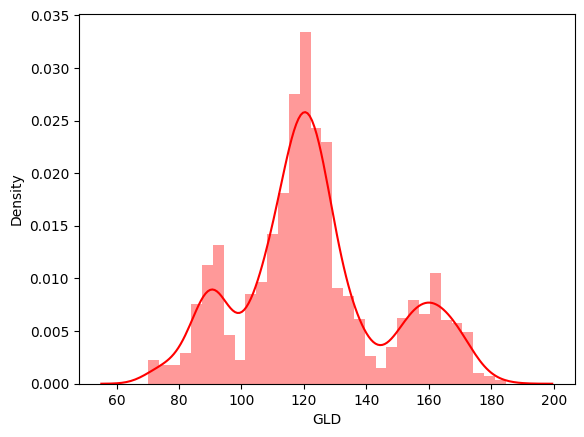

In [ ]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='Red')

Splitting the feature

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [ ]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

Splitting into Training Data and Testing Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Model training :- Random Forest

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test Data
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.57909971  82.17619969 115.62190038 127.6819007  120.60990136
 154.62509778 150.03109891 126.01760029 117.65379866 126.06910045
 116.81280087 172.35050094 141.42959831 167.66699813 115.37789997
 117.8020004  139.03030321 170.14110114 159.42000341 156.62639958
 155.15459999 125.54340021 176.49819938 157.38720308 125.07970056
  93.54229976  78.25410009 120.81629972 119.14749936 167.45239941
  88.16349997 125.30569967  91.17720095 117.59540016 121.0810993
 136.7576009  115.31740145 115.37620083 146.09400011 107.47670069
 104.13910213  87.1327978  126.51910068 117.80880035 153.14059874
 119.52160039 108.39200001 107.96489812  93.2387005  127.19039775
  75.25090032 113.64689922 121.37529995 111.38429938 118.91289888
 120.84909932 159.30879954 168.70410109 146.82189646  85.78199876
  94.27960037  86.7099988   90.70510006 118.93180081 126.44030066
 127.58000034 169.55489986 122.28759904 117.4440988   98.53230047
 167.88380044 142.98229834 132.07800235 121.27940213 120.95359935
 119.601600

In [ ]:
#predict these values with actual values
#Y_test are actual values
# 1) R quared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print("R squared error :",error_score)

R squared error : 0.9896529624857578


Compare the actual values and predicted values in plot

In [ ]:
Y_test=list(Y_test)

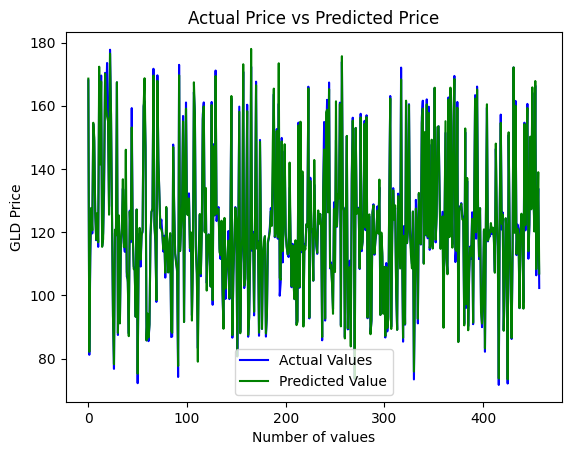

In [ ]:
plt.plot(Y_test,color="blue",label="Actual Values")
plt.plot(test_data_prediction, color="green", label="Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()
